# Eurostat

In [1]:
import eurostat
toc = eurostat.get_toc_df()
toc[['Electricity' in i for i in toc['title']]]

,title,code,type,last update of data,last table structure change,data start,data end
5238,"Electricity, gas and water by employment size ...",sbs_sc_2d_el95,dataset,24.05.2016,08.02.2021,1995,2001
5239,"Electricity, gas and water by employment size ...",sbs_sc_2d_el02,dataset,24.05.2016,08.02.2021,2002,2007
7115,Electricity production capacities by main fuel...,nrg_inf_epc,dataset,10.03.2022,27.01.2022,1990,2020
7116,Electricity production capacities for renewabl...,nrg_inf_epcrw,dataset,07.03.2022,27.01.2022,1990,2020
7117,Electricity production capacities for combusti...,nrg_inf_epct,dataset,10.03.2022,27.01.2022,1990,2020
7151,Electricity available to internal market,nrg_cb_eim,dataset,29.03.2022,11.03.2022,2008M01,2022M01
7198,Electricity prices for household consumers - b...,nrg_pc_204,dataset,29.03.2022,23.03.2022,2007S1,2021S2
7199,Electricity prices for non-household consumers...,nrg_pc_205,dataset,29.03.2022,23.03.2022,2007S1,2021S2
7206,Electricity prices components for household co...,nrg_pc_204_c,dataset,25.03.2022,23.03.2022,2007S2,2021
7207,Electricity prices components for non-househol...,nrg_pc_205_c,dataset,25.03.2022,23.03.2022,2007S2,2021


In [2]:
def thick_line(symbol,ax,col=None):
    labels=[i._label for i in ax.lines]  #makes a list of symbols in the order of lines in the axis object
    i=labels.index(symbol)               #identifies at which position symbol is located
    ax.lines[i].set_linewidth(5)         #sets the line with of the line at position i to 5 
    ax.lines[i].set_alpha(1)             #sets removes transparancy of the line at position i to 5 
    if not col is None:
        ax.lines[i].set_color(col)

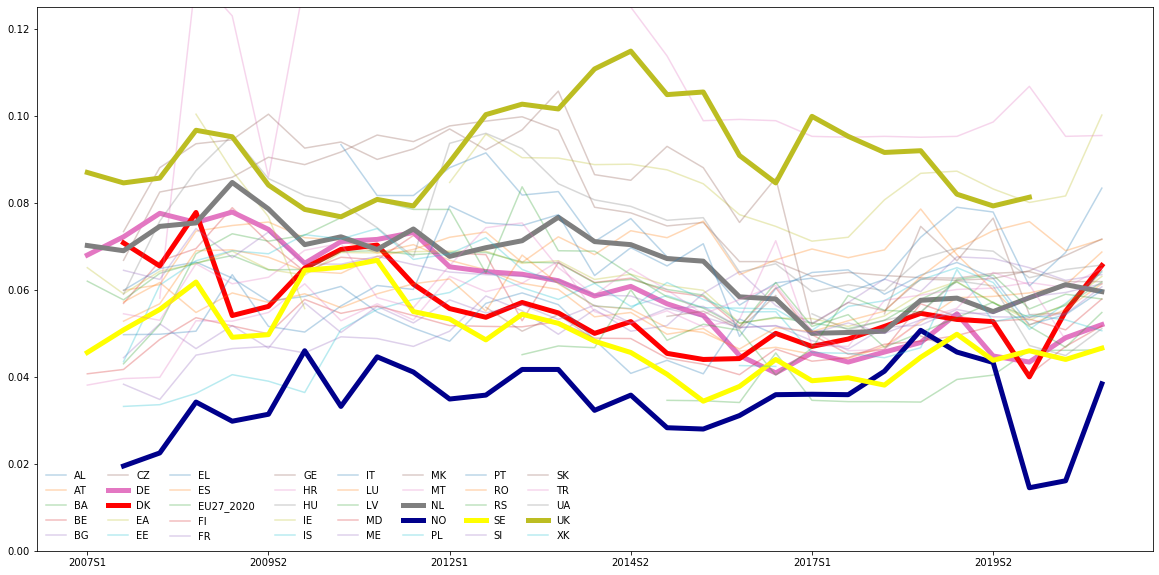

In [3]:
import eurostat
import numpy as np
df = eurostat.get_data_df('nrg_pc_205')
df=df[(df['tax']=='X_TAX')*
   (df['consom']=='4162906')*
   (df['currency']=='EUR')*
     (df!=0).all(axis=1)]

cols=['geo\\time']+[f"{y}S{s}" for y in range(2007,2022) for s in [1,2]][:-1]
df=df[cols].set_index('geo\\time').transpose()
ax=df.plot(alpha=0.3,figsize=(20, 10))
ax.set_ylim([0, 0.125])
thick_line('DE',ax)
thick_line('NO',ax,'darkblue')
thick_line('NL',ax)
thick_line('UK',ax)
thick_line('SE',ax,'yellow')
thick_line('DK',ax,'red')
ax.legend(loc='lower left',frameon=False,ncol=8)


# SSB-nordpool

In [105]:
import pandas as pd
data = pd.read_csv("kraft pris-prod.csv", sep=';')
data

,Dato,Pris,Total kraftproduksjon,Import,Eksport
0,2010-01-01,411.32,14825249,955497,802312
1,2010-02-01,642.71,12624913,936811,411703
2,2010-03-01,484.36,11229016,1447281,150579
3,2010-04-01,385.48,8708195,1657794,118342
4,2010-05-01,355.46,7599771,2077840,284937
...,...,...,...,...,...
141,2021-10-01,961.13,12359480,979048,2238711
142,2021-11-01,1063.28,14420057,671276,2681304
143,2021-12-01,1771.26,16042237,896342,2574178
144,2022-01-01,1406.31,15079225,1166600,2381784


In [106]:
from statsmodels.regression.linear_model import OLS
preF2021=data['Dato']<'2021-06-01'
data['Nettoeksport %'] = (data['Eksport']-data['Import'])/data['Total kraftproduksjon']
y=pd.DataFrame(data['Nettoeksport %'])
y['Intercept']=1

res=OLS(data['Pris'][preF2021],y[preF2021]).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Pris   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     72.86
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           2.54e-14
Time:                        10:42:05   Log-Likelihood:                -827.86
No. Observations:                 137   AIC:                             1660.
Df Residuals:                     135   BIC:                             1666.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Nettoeksport %  -739.9745     86.688     -8.

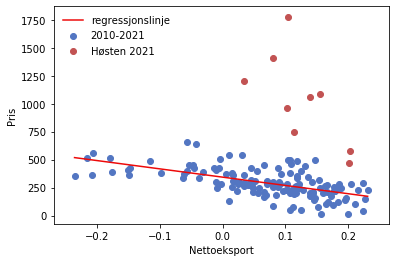

In [107]:
import numpy as np
from matplotlib import pyplot as plt




fig,ax=plt.subplots()


ax.set_ylabel('Pris')
ax.set_xlabel('Nettoeksport')



ax.scatter(data['Nettoeksport %'][preF2021], data['Pris'][preF2021],               label='2010-2021',    color='#5376c2')
ax.scatter(data['Nettoeksport %'][preF2021==False], data['Pris'][preF2021==False], label='Høsten 2021',    color='#c25353')

x=np.linspace(min(data['Nettoeksport %']),max(data['Nettoeksport %']),100)

ax.plot(x,res.params[1]+res.params[0]*x , label='regressjonslinje',    color='#ed0909')

#5. adding legend in the upper left corner:
ax.legend(loc='upper left',frameon=False)


# Estimere etterspørselskurven

In [98]:
data['År']=pd.to_datetime(data['Dato']).dt.year
f=list(data.columns)
f.pop(f.index('Dato'))
data_annual=data.groupby(data['År'])[f].transform('mean')
data_annual=data_annual.drop_duplicates()
data_annual

,Pris,Total kraftproduksjon,Import,Eksport,Nettoeksport %,År
0,436.007500,1.037062e+07,1.222712e+06,5.936228e+05,-0.070281,2010.0
12,363.195833,1.067870e+07,9.378839e+05,1.194069e+06,0.017329,2011.0
24,221.833333,1.232046e+07,3.491902e+05,1.833864e+06,0.125047,2012.0
36,292.284167,1.118666e+07,8.446157e+05,1.261707e+06,0.040566,2013.0
48,228.901667,1.186058e+07,5.289329e+05,1.827706e+06,0.115077,2014.0
60,177.392500,1.208507e+07,6.175534e+05,1.836502e+06,0.103398,2015.0
72,242.450833,1.246095e+07,4.783888e+05,1.845883e+06,0.114945,2016.0
84,270.880000,1.243776e+07,5.093116e+05,1.773018e+06,0.106196,2017.0
96,419.030000,1.223708e+07,6.949770e+05,1.540743e+06,0.070119,2018.0
108,387.015833,1.121955e+07,1.029427e+06,1.025768e+06,0.002884,2019.0


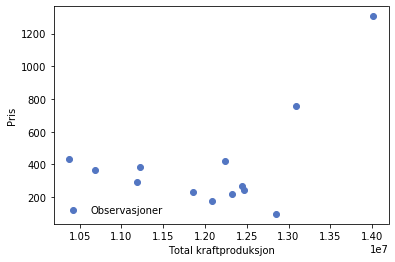

In [99]:
fig,ax=plt.subplots()

ax.set_ylabel('Pris')
ax.set_xlabel('Total kraftproduksjon')



ax.scatter((data_annual['Total kraftproduksjon']), data_annual['Pris'], label='Observasjoner', color='#5376c2')

ax.legend(loc='lower left',frameon=False)

## Finner log

In [100]:
data_annual['Log total kraftproduksjon']=np.log(data_annual['Total kraftproduksjon'])
data_annual['Log pris']=np.log(data_annual['Pris'])
data_annual

,Pris,Total kraftproduksjon,Import,Eksport,Nettoeksport %,År,Log total kraftproduksjon,Log pris
0,436.007500,1.037062e+07,1.222712e+06,5.936228e+05,-0.070281,2010.0,16.154487,6.077659
12,363.195833,1.067870e+07,9.378839e+05,1.194069e+06,0.017329,2011.0,16.183762,5.894942
24,221.833333,1.232046e+07,3.491902e+05,1.833864e+06,0.125047,2012.0,16.326772,5.401926
36,292.284167,1.118666e+07,8.446157e+05,1.261707e+06,0.040566,2013.0,16.230232,5.677727
48,228.901667,1.186058e+07,5.289329e+05,1.827706e+06,0.115077,2014.0,16.288731,5.433293
60,177.392500,1.208507e+07,6.175534e+05,1.836502e+06,0.103398,2015.0,16.307482,5.178365
72,242.450833,1.246095e+07,4.783888e+05,1.845883e+06,0.114945,2016.0,16.338111,5.490799
84,270.880000,1.243776e+07,5.093116e+05,1.773018e+06,0.106196,2017.0,16.336248,5.601676
96,419.030000,1.223708e+07,6.949770e+05,1.540743e+06,0.070119,2018.0,16.319981,6.037943
108,387.015833,1.121955e+07,1.029427e+06,1.025768e+06,0.002884,2019.0,16.233169,5.958466


## Estimerer etterspørselens priselastisitet

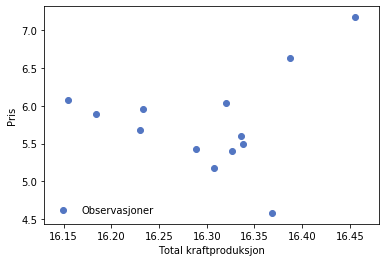

In [101]:

fig,ax=plt.subplots()

ax.set_ylabel('Pris')
ax.set_xlabel('Total kraftproduksjon')



ax.scatter((data_annual['Log total kraftproduksjon']), data_annual['Log pris'], label='Observasjoner', color='#5376c2')

ax.legend(loc='lower left',frameon=False)

                            OLS Regression Results                            
Dep. Variable:               Log pris   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.4118
Date:                Wed, 30 Mar 2022   Prob (F-statistic):              0.534
Time:                        20:32:55   Log-Likelihood:                -12.063
No. Observations:                  13   AIC:                             28.13
Df Residuals:                      11   BIC:                             29.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Log total kraftproduks

c:\program files\python38\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


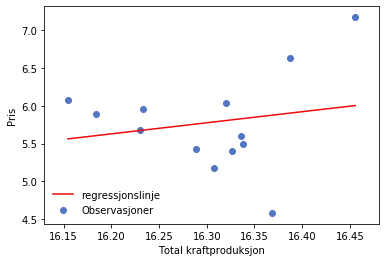

In [102]:
y=pd.DataFrame(data_annual['Log total kraftproduksjon'])
y['Intercept']=1

res=OLS(data_annual['Log pris'],y).fit()

print(res.summary())

x=np.linspace(min(data_annual['Log total kraftproduksjon']),max(data_annual['Log total kraftproduksjon']),100)

ax.plot(x,res.params[1]+res.params[0]*x , label='regressjonslinje',    color='#ed0909')

#5. adding legend in the upper left corner:
ax.legend(loc='lower left',frameon=False)
fig

## Fjerner uteliggere

                            OLS Regression Results                            
Dep. Variable:               Log pris   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     8.004
Date:                Wed, 30 Mar 2022   Prob (F-statistic):             0.0197
Time:                        20:33:28   Log-Likelihood:                -2.5319
No. Observations:                  11   AIC:                             9.064
Df Residuals:                       9   BIC:                             9.860
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Log total kraftproduks

c:\program files\python38\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


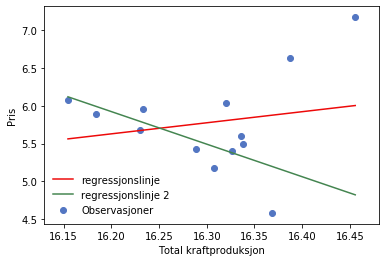

In [103]:
flter=data_annual['År']<2021

y=pd.DataFrame(data_annual['Log total kraftproduksjon'])[flter]
y['Intercept']=1

res=OLS(data_annual['Log pris'][flter],y).fit()

print(res.summary())

ax.plot(x,res.params[1]+res.params[0]*x , label='regressjonslinje 2',    color='#448550')

#5. adding legend in the upper left corner:
ax.legend(loc='lower left',frameon=False)
fig

## Etterspørselselastisitet

In [104]:
flter=data_annual['År']<2021

y=pd.DataFrame(data_annual['Log pris'])[flter]
y['Intercept']=1

res=OLS(data_annual['Log total kraftproduksjon'][flter],y).fit()
print(res.summary())

                                OLS Regression Results                               
Dep. Variable:     Log total kraftproduksjon   R-squared:                       0.471
Model:                                   OLS   Adj. R-squared:                  0.412
Method:                        Least Squares   F-statistic:                     8.004
Date:                       Wed, 30 Mar 2022   Prob (F-statistic):             0.0197
Time:                               20:33:46   Log-Likelihood:                 17.697
No. Observations:                         11   AIC:                            -31.39
Df Residuals:                              9   BIC:                            -30.60
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

c:\program files\python38\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Mulig oppgave: Finn priseffekt av utenlandskablene

# Årlige data

In [110]:
import pandas as pd
data_annual = pd.read_csv("årlig kraft pris-prod.csv", sep=';')
data_annual['Log produksjon i alt']=np.log(data_annual['Produksjon i alt'])
data_annual['Log Oslo']=np.log(data_annual['Oslo'])
data_annual

,År,Oslo,Tromsø,Produksjon i alt,Import,Eksport,Log produksjon i alt,Log Oslo
0,2000,97.79,100.76,142816,1474,20529,11.869312,4.582822
1,2001,186.28,188.83,121608,10760,7162,11.708558,5.227251
2,2002,198.00,199.68,130473,5329,15002,11.778922,5.288267
3,2003,294.10,290.67,107245,13472,5587,11.582871,5.683920
4,2004,246.10,243.79,110472,15334,3842,11.612517,5.505738
5,2005,232.87,235.04,137811,3653,15695,11.833638,5.450480
6,2006,396.42,394.57,121400,9802,8947,11.706846,5.982474
7,2007,206.43,235.69,137164,5284,15320,11.828933,5.329961
8,2008,324.50,410.09,142108,3414,17291,11.864343,5.782286
9,2009,295.59,310.88,131773,5650,14633,11.788836,5.688973


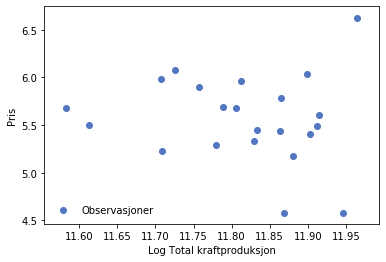

In [111]:
fig,ax=plt.subplots()

ax.set_ylabel('Pris')
ax.set_xlabel('Log Total kraftproduksjon')



ax.scatter((data_annual['Log produksjon i alt']), data_annual['Log Oslo'], label='Observasjoner', color='#5376c2')

ax.legend(loc='lower left',frameon=False)

                            OLS Regression Results                            
Dep. Variable:               Log Oslo   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.2647
Date:                Thu, 31 Mar 2022   Prob (F-statistic):              0.613
Time:                        11:00:49   Log-Likelihood:                -13.710
No. Observations:                  22   AIC:                             31.42
Df Residuals:                      20   BIC:                             33.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Log produksjon i alt    -0.5221 

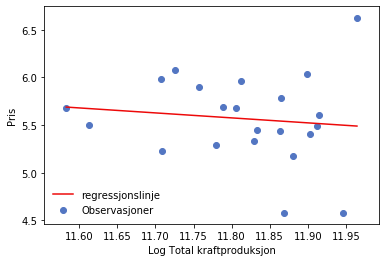

In [112]:
y=pd.DataFrame(data_annual['Log produksjon i alt'])
y['Intercept']=1

res=OLS(data_annual['Log Oslo'],y).fit()

print(res.summary())

x=np.linspace(min(data_annual['Log produksjon i alt']),max(data_annual['Log produksjon i alt']),100)

ax.plot(x,res.params[1]+res.params[0]*x , label='regressjonslinje',    color='#ed0909')

#5. adding legend in the upper left corner:
ax.legend(loc='lower left',frameon=False)
fig